In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from numpy import arange
from pandas import read_csv
import math
import datetime 
from datetime import timedelta
from datetime import date
import calendar
from statistics import mean
import pytz
import holidays

### Holidays
[Documentation link](https://pypi.org/project/holidays/)
>
>__is_holiday__(): tooks as arguments date and country code. If if date is holidays in specified country function returns __True__ else __False__.
>
>__is_weekend__(): tooks only datetime.
>
>__convert_ny_to_eu__(): converts NY time to Berlin
>
>__convert_eu_to_ny__(): converts Berlin time to NY

In [2]:
def is_holiday(_date:datetime, country_code:str) -> bool:
    _holidays = holidays.country_holidays(country_code)
    return True if _date in _holidays else False

def is_weekend(_date:datetime) -> bool:
    return False if _date.weekday() < 5 else True

def convert_ny_to_eu(_datetime:datetime) -> datetime:
    newyork_tz = pytz.timezone('America/New_York')
    berlin_tz = pytz.timezone('Europe/Berlin')

    newyork = newyork_tz.localize(_datetime)
    return newyork.astimezone(berlin_tz)

def convert_eu_to_ny(_datetime:datetime) -> datetime:
    newyork_tz = pytz.timezone('America/New_York')
    berlin_tz = pytz.timezone('Europe/Berlin')
    
    berlin = berlin_tz.localize(_datetime)
    return berlin.astimezone(newyork_tz)

### Read raw csv file

In [159]:
data = pd.read_csv('/Users/zlatatabachova/Documents/entropy/data/export_011122/stock_2022-11-01.csv', delimiter='`') 
data['created_at'] = pd.to_datetime(data.created_at)
data['created_at'] = data['created_at'].dt.strftime('%Y-%m-%d %H:%M')
data['created_at'] = pd.to_datetime(data.created_at)


In [160]:
data_missing = pd.read_csv('/Users/zlatatabachova/Documents/entropy/data/october/missing_october.txt', delimiter=';') 
data_missing = data_missing.rename(columns={'Unnamed: 0': 'created_at'})
data_missing['created_at'] = pd.to_datetime(data_missing.created_at)
data_missing['created_at'] = data_missing['created_at'].dt.strftime('%Y-%m-%d %H:%M')
data_missing['created_at'] = pd.to_datetime(data_missing.created_at)
data_missing

,created_at,AAPL,AMZN,BRK.B,GOOG,GOOGL,JNJ,JPM,LXRX,META,MSFT,NVDA,PG,PLUG,TSLA,UNH,V,XOM,XPEV,^GSPC
0,2022-10-21 09:30:00,143.350006,114.760002,NaN,98.470001,97.945000,164.880005,116.750000,1.9171,126.839996,235.179993,120.650101,NaN,15.985000,205.168594,520.020020,185.250000,104.150002,7.6850,3652.840088
1,2022-10-21 09:31:00,143.139999,115.300003,NaN,99.029999,98.519997,164.889999,117.209999,1.9104,128.225998,235.710007,121.209999,126.599998,15.990000,206.750000,519.530029,186.074997,104.639999,7.6900,3659.689941
2,2022-10-21 09:32:00,143.365005,115.860001,NaN,99.360001,98.839996,165.110001,116.869698,1.9000,128.820007,236.199997,121.879997,127.080002,16.109900,207.399994,520.609985,186.488800,104.769997,7.7400,3665.560059
3,2022-10-21 09:33:00,143.104996,115.589996,NaN,99.000000,98.529999,164.830002,116.570000,1.9100,128.410004,235.880005,120.930000,127.400002,15.940000,206.815002,519.265015,186.000000,104.610001,7.7099,3660.110107
4,2022-10-21 09:34:00,142.889999,115.230003,NaN,98.800003,98.360001,164.520004,116.550003,1.8900,127.510002,235.625000,120.305000,126.989998,15.920000,206.122498,518.669983,185.929993,104.584999,7.6700,3655.370117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2022-10-26 15:55:00,149.240005,115.690002,NaN,95.084999,95.129997,172.440002,124.050003,2.1300,129.710007,231.779999,129.169296,132.029999,16.485001,224.389999,543.284973,203.720001,107.290001,8.1850,3834.010010
1556,2022-10-26 15:56:00,149.264999,115.650002,NaN,94.974998,95.074997,172.389999,124.095001,2.1300,129.669998,231.679993,129.059998,131.919998,16.465000,224.460007,543.369995,203.619995,107.230003,8.1850,3832.669922
1557,2022-10-26 15:57:00,149.220001,115.544998,NaN,94.838303,94.949997,172.399994,124.114998,2.1250,129.664993,231.417496,128.928604,131.921997,16.445000,224.569901,543.299988,203.574997,107.190002,8.1900,3831.070068
1558,2022-10-26 15:58:00,149.139999,115.470100,NaN,94.834999,94.934998,172.320007,124.029999,2.1250,129.419998,231.179993,128.919998,131.899994,16.430000,224.339996,542.909973,203.339996,107.160004,8.1900,3829.159912


In [161]:
creat_at=[]
for i in range(0,len(data_missing)):
    creat_at.append(convert_ny_to_eu(data_missing['created_at'][i]))
    
data_missing['created_at']= creat_at
data_missing['created_at'] = pd.to_datetime(data_missing.created_at)
data_missing['created_at'] = data_missing['created_at'].dt.strftime('%Y-%m-%d %H:%M')
data_missing['created_at'] = pd.to_datetime(data_missing.created_at)

In [162]:
data_missing

,created_at,AAPL,AMZN,BRK.B,GOOG,GOOGL,JNJ,JPM,LXRX,META,MSFT,NVDA,PG,PLUG,TSLA,UNH,V,XOM,XPEV,^GSPC
0,2022-10-21 15:30:00,143.350006,114.760002,NaN,98.470001,97.945000,164.880005,116.750000,1.9171,126.839996,235.179993,120.650101,NaN,15.985000,205.168594,520.020020,185.250000,104.150002,7.6850,3652.840088
1,2022-10-21 15:31:00,143.139999,115.300003,NaN,99.029999,98.519997,164.889999,117.209999,1.9104,128.225998,235.710007,121.209999,126.599998,15.990000,206.750000,519.530029,186.074997,104.639999,7.6900,3659.689941
2,2022-10-21 15:32:00,143.365005,115.860001,NaN,99.360001,98.839996,165.110001,116.869698,1.9000,128.820007,236.199997,121.879997,127.080002,16.109900,207.399994,520.609985,186.488800,104.769997,7.7400,3665.560059
3,2022-10-21 15:33:00,143.104996,115.589996,NaN,99.000000,98.529999,164.830002,116.570000,1.9100,128.410004,235.880005,120.930000,127.400002,15.940000,206.815002,519.265015,186.000000,104.610001,7.7099,3660.110107
4,2022-10-21 15:34:00,142.889999,115.230003,NaN,98.800003,98.360001,164.520004,116.550003,1.8900,127.510002,235.625000,120.305000,126.989998,15.920000,206.122498,518.669983,185.929993,104.584999,7.6700,3655.370117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2022-10-26 21:55:00,149.240005,115.690002,NaN,95.084999,95.129997,172.440002,124.050003,2.1300,129.710007,231.779999,129.169296,132.029999,16.485001,224.389999,543.284973,203.720001,107.290001,8.1850,3834.010010
1556,2022-10-26 21:56:00,149.264999,115.650002,NaN,94.974998,95.074997,172.389999,124.095001,2.1300,129.669998,231.679993,129.059998,131.919998,16.465000,224.460007,543.369995,203.619995,107.230003,8.1850,3832.669922
1557,2022-10-26 21:57:00,149.220001,115.544998,NaN,94.838303,94.949997,172.399994,124.114998,2.1250,129.664993,231.417496,128.928604,131.921997,16.445000,224.569901,543.299988,203.574997,107.190002,8.1900,3831.070068
1558,2022-10-26 21:58:00,149.139999,115.470100,NaN,94.834999,94.934998,172.320007,124.029999,2.1250,129.419998,231.179993,128.919998,131.899994,16.430000,224.339996,542.909973,203.339996,107.160004,8.1900,3829.159912


### Get unique stock names and filter raw dataframe. __Filter_by_stock__ contains filtered dataframes by stock name.

In [163]:
filter_by_stock = []
stock_names = data.m_name.unique().tolist()

for stock_name in stock_names:
    df = data[data['m_name']==stock_name]
    filter_by_stock.append(df)
    

In [164]:
filter_by_stock

[            m_name  name_id m_code m_type m_curr   price          created_at
 0       Apple Inc.        1   AAPL  stock    USD  137.53 2022-10-01 00:00:00
 18      Apple Inc.        1   AAPL  stock    USD  137.54 2022-10-01 00:01:00
 36      Apple Inc.        1   AAPL  stock    USD  137.56 2022-10-01 00:02:00
 54      Apple Inc.        1   AAPL  stock    USD  137.55 2022-10-01 00:03:00
 72      Apple Inc.        1   AAPL  stock    USD  137.57 2022-10-01 00:04:00
 ...            ...      ...    ...    ...    ...     ...                 ...
 684854  Apple Inc.        1   AAPL  stock    USD  153.31 2022-10-31 23:55:00
 684872  Apple Inc.        1   AAPL  stock    USD  153.30 2022-10-31 23:56:00
 684890  Apple Inc.        1   AAPL  stock    USD  153.29 2022-10-31 23:57:00
 684908  Apple Inc.        1   AAPL  stock    USD  153.34 2022-10-31 23:58:00
 684926  Apple Inc.        1   AAPL  stock    USD  153.31 2022-10-31 23:59:00
 
 [38052 rows x 7 columns],
                               m_na

### Defining datetime frame

In [165]:
start_date = data.min()['created_at']
end_date = data.max()['created_at']
print(f"Data starts from {start_date} till {end_date}")

Data starts from 2022-10-01 00:00:00 till 2022-10-31 23:59:00


### Drop duplicates and sorting values by __created_at__

In [174]:
first_stock = filter_by_stock[0]

In [175]:
missing_df=data_missing[['created_at',first_stock['m_code'][0]]]#####zkontrolovat jestli m cody sedi s yahoo
missing_df = missing_df.rename(columns={first_stock['m_code'][0]: 'price'})

first_stock = pd.concat([first_stock,missing_df])

first_stock = first_stock.drop_duplicates(subset='created_at', keep="first")
first_stock = first_stock.sort_values(by=['created_at'], ascending=True)
first_stock=first_stock.reset_index()


### Creating dataframe with complete dates and merging with existing data

In [176]:
numminutes = round((end_date-start_date).total_seconds() / 60)
dateList = []

for x in range (0, numminutes+1):
    dateList.append(end_date - datetime.timedelta(minutes = x))

full_dates = pd.DataFrame(dateList, columns=['created_at'])

first_stock = pd.merge(first_stock, full_dates, how="right", on="created_at")
first_stock = first_stock.sort_values(by=['created_at'], ascending=True)


In [177]:
first_stock

,index,m_name,name_id,m_code,m_type,m_curr,price,created_at
44639,0.0,Apple Inc.,1.0,AAPL,stock,USD,137.53,2022-10-01 00:00:00
44638,18.0,Apple Inc.,1.0,AAPL,stock,USD,137.54,2022-10-01 00:01:00
44637,36.0,Apple Inc.,1.0,AAPL,stock,USD,137.56,2022-10-01 00:02:00
44636,54.0,Apple Inc.,1.0,AAPL,stock,USD,137.55,2022-10-01 00:03:00
44635,72.0,Apple Inc.,1.0,AAPL,stock,USD,137.57,2022-10-01 00:04:00
...,...,...,...,...,...,...,...,...
4,684854.0,Apple Inc.,1.0,AAPL,stock,USD,153.31,2022-10-31 23:55:00
3,684872.0,Apple Inc.,1.0,AAPL,stock,USD,153.30,2022-10-31 23:56:00
2,684890.0,Apple Inc.,1.0,AAPL,stock,USD,153.29,2022-10-31 23:57:00
1,684908.0,Apple Inc.,1.0,AAPL,stock,USD,153.34,2022-10-31 23:58:00


### Remove rows with weekends or holidays and fill null price values

In [178]:
df_dates = first_stock["created_at"].map(lambda t: t.date()).unique()
for _date in df_dates:
    if is_weekend(_date) or is_holiday(_date, 'US'):
        from_dt = datetime.datetime.combine(_date, datetime.datetime.min.time())
        to_dt = from_dt + datetime.timedelta(days=1)
        first_stock = first_stock[(first_stock['created_at'] < from_dt) | (first_stock['created_at'] > to_dt)]

first_stock = first_stock.fillna(method='ffill')
#first_stock=first_stock.reset_index()

In [179]:
first_stock=first_stock.reset_index()

In [180]:
opening = '15:31'
open_dt = datetime.datetime.strptime(opening, '%H:%M')
open_date = open_dt.time()
closing = '22:01'
closing_dt = datetime.datetime.strptime(closing, '%H:%M')
close_date = closing_dt.time()
to_drop = []
for k in range(0,len(first_stock)):
    if open_date>first_stock['created_at'][k].time() or first_stock['created_at'][k].time()>close_date:
        to_drop.append(k)
first_stock=first_stock.drop(to_drop) 


In [183]:
first_stock

,level_0,index,m_name,name_id,m_code,m_type,m_curr,price,created_at
930,40828,68400.0,Apple Inc.,1.0,AAPL,stock,USD,138.07,2022-10-03 15:31:00
931,40827,68418.0,Apple Inc.,1.0,AAPL,stock,USD,138.07,2022-10-03 15:32:00
932,40826,68436.0,Apple Inc.,1.0,AAPL,stock,USD,138.02,2022-10-03 15:33:00
933,40825,68454.0,Apple Inc.,1.0,AAPL,stock,USD,138.56,2022-10-03 15:34:00
934,40824,68472.0,Apple Inc.,1.0,AAPL,stock,USD,138.73,2022-10-03 15:35:00
...,...,...,...,...,...,...,...,...,...
28672,122,682748.0,Apple Inc.,1.0,AAPL,stock,USD,153.40,2022-10-31 21:57:00
28673,121,682766.0,Apple Inc.,1.0,AAPL,stock,USD,153.45,2022-10-31 21:58:00
28674,120,682766.0,Apple Inc.,1.0,AAPL,stock,USD,153.45,2022-10-31 21:59:00
28675,119,682784.0,Apple Inc.,1.0,AAPL,stock,USD,153.42,2022-10-31 22:00:00


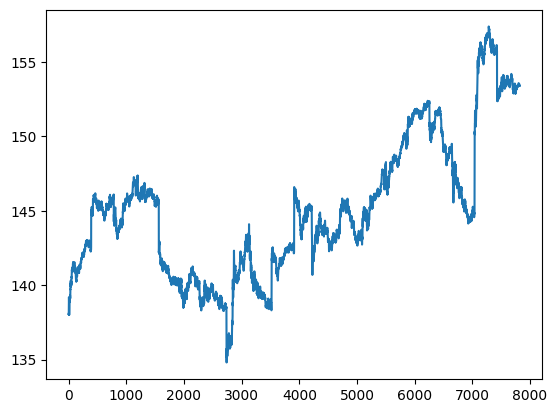

In [189]:
plt.plot(list(range(0,len(first_stock))),first_stock['price'])

# End 09-07-23 ________

In [4]:
tab = pd.read_csv('missing_october.txt', delimiter=';') 
tab.columns=['created_at','Apple Inc.','Amazon.com Inc.','Berkshire Hathaway Inc. Cl B.','Alphabet Inc. Cl C',
'Alphabet Inc. Cl A','Johnson & Johnson','JPMorgan Chase & Co.','Lexicon Pharmaceuticals Inc.',
'Meta Platforms Inc.','Microsoft Corp.','NVIDIA Corp.','Procter & Gamble Co.','Plug Power Inc.',
'Tesla Inc.','UnitedHealth Group Inc.','Visa Inc. Cl A','Exxon Mobil Corp.','XPeng Inc. ADR','S&P 500 Index']
tab.head

<bound method NDFrame.head of                created_at  Apple Inc.  Amazon.com Inc.  \
0     2022-10-21 09:30:00  143.350006       114.760002   
1     2022-10-21 09:31:00  143.139999       115.300003   
2     2022-10-21 09:32:00  143.365005       115.860001   
3     2022-10-21 09:33:00  143.104996       115.589996   
4     2022-10-21 09:34:00  142.889999       115.230003   
...                   ...         ...              ...   
1555  2022-10-26 15:55:00  149.240005       115.690002   
1556  2022-10-26 15:56:00  149.264999       115.650002   
1557  2022-10-26 15:57:00  149.220001       115.544998   
1558  2022-10-26 15:58:00  149.139999       115.470100   
1559  2022-10-26 15:59:00  149.509995       115.699997   

      Berkshire Hathaway Inc. Cl B.  Alphabet Inc. Cl C  Alphabet Inc. Cl A  \
0                               NaN           98.470001           97.945000   
1                               NaN           99.029999           98.519997   
2                               NaN 

In [21]:
tab.query("created_at == '2022-10-24 09:30:00'").index

Int64Index([779], dtype='int64')

In [22]:
datum=tab['created_at']

In [45]:
datetime(2022,10,24,9,30,0,tzinfo=pytz.country_timezones('USA/New_York'))

KeyError: 'USA/NEW_YORK'

In [44]:
md=datetime.datetime.strptime(datum[1],'%Y-%m-%d %H:%M:%S %Z%z',tzinfo=pytz.utc)

TypeError: strptime() takes no keyword arguments

In [39]:
md

datetime.datetime(2022, 10, 21, 9, 31)

In [41]:
md.astimezone(pytz.timezone('Europe/Berlin')).strftime('%Y-%m-%d %H:%M:%S %Z%z')

'2022-10-21 09:31:00 CEST+0200'

In [26]:
type(datum[1])

str

In [30]:
data.m_name.unique()

array(['Dow Jones Industrial Average', 'Nifty 50 Index', 'FTSE 100 Index',
       'FTSE ALL-WORLD', 'DAX', 'NASDAQ Composite Index', 'S&P 500 Index',
       'NIKKEI 225 Index'], dtype=object)

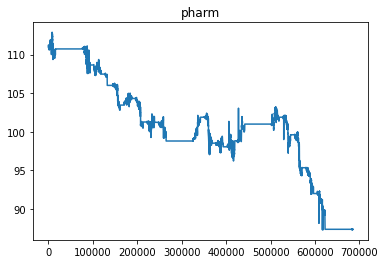

In [290]:
plt.plot(data_15['price']) 
plt.title('pharm') 
plt.draw() 
plt.show()

In [291]:
start=data.iloc[-1]['created_at']
end=data.loc[0, 'created_at']
start_date = datetime.datetime.strptime(start,'%Y-%m-%d %H:%M:%S.%f').replace(second=0,microsecond=0)
end_date = datetime.datetime.strptime(end,'%Y-%m-%d %H:%M:%S.%f').replace(second=0,microsecond=0)

In [292]:
numminutes = round((end_date-start_date).total_seconds() / 60)
dateList = []
for x in range (0, numminutes):
    dateList.append(end_date - datetime.timedelta(minutes = x))
dateList

[datetime.datetime(2022, 10, 31, 23, 59),
 datetime.datetime(2022, 10, 31, 23, 58),
 datetime.datetime(2022, 10, 31, 23, 57),
 datetime.datetime(2022, 10, 31, 23, 56),
 datetime.datetime(2022, 10, 31, 23, 55),
 datetime.datetime(2022, 10, 31, 23, 54),
 datetime.datetime(2022, 10, 31, 23, 53),
 datetime.datetime(2022, 10, 31, 23, 52),
 datetime.datetime(2022, 10, 31, 23, 51),
 datetime.datetime(2022, 10, 31, 23, 50),
 datetime.datetime(2022, 10, 31, 23, 49),
 datetime.datetime(2022, 10, 31, 23, 48),
 datetime.datetime(2022, 10, 31, 23, 47),
 datetime.datetime(2022, 10, 31, 23, 46),
 datetime.datetime(2022, 10, 31, 23, 45),
 datetime.datetime(2022, 10, 31, 23, 44),
 datetime.datetime(2022, 10, 31, 23, 43),
 datetime.datetime(2022, 10, 31, 23, 42),
 datetime.datetime(2022, 10, 31, 23, 41),
 datetime.datetime(2022, 10, 31, 23, 40),
 datetime.datetime(2022, 10, 31, 23, 39),
 datetime.datetime(2022, 10, 31, 23, 38),
 datetime.datetime(2022, 10, 31, 23, 37),
 datetime.datetime(2022, 10, 31, 2

In [293]:
date_15 = []
for x in range (0, len(data_15['created_at'])):
    date_15.append(datetime.datetime.strptime(list(data_15['created_at'])[x],'%Y-%m-%d %H:%M:%S.%f').replace(second=0,microsecond=0))


In [294]:
date_15

[datetime.datetime(2022, 10, 31, 23, 59),
 datetime.datetime(2022, 10, 31, 23, 58),
 datetime.datetime(2022, 10, 31, 23, 57),
 datetime.datetime(2022, 10, 31, 23, 56),
 datetime.datetime(2022, 10, 31, 23, 55),
 datetime.datetime(2022, 10, 31, 23, 54),
 datetime.datetime(2022, 10, 31, 23, 53),
 datetime.datetime(2022, 10, 31, 23, 52),
 datetime.datetime(2022, 10, 31, 23, 51),
 datetime.datetime(2022, 10, 31, 23, 50),
 datetime.datetime(2022, 10, 31, 23, 49),
 datetime.datetime(2022, 10, 31, 23, 48),
 datetime.datetime(2022, 10, 31, 23, 47),
 datetime.datetime(2022, 10, 31, 23, 46),
 datetime.datetime(2022, 10, 31, 23, 45),
 datetime.datetime(2022, 10, 31, 23, 44),
 datetime.datetime(2022, 10, 31, 23, 43),
 datetime.datetime(2022, 10, 31, 23, 42),
 datetime.datetime(2022, 10, 31, 23, 41),
 datetime.datetime(2022, 10, 31, 23, 40),
 datetime.datetime(2022, 10, 31, 23, 39),
 datetime.datetime(2022, 10, 31, 23, 38),
 datetime.datetime(2022, 10, 31, 23, 37),
 datetime.datetime(2022, 10, 31, 2

In [295]:
missing=list(set(dateList)-set(date_15))

In [296]:
p=[]
for k in range(0,len(dateList)):
    if dateList[k] in missing:
        p.append(99)
    else:
        p.append(p_15[date_15.index(dateList[k])])

In [297]:
pp=[]
for k in range(0,len(dateList)):
    if p[k]==99:
        p[k] = (p[k-1])
        print(k)
        pp.append(p[k-1])

120
177
178
179
180
919
920
921
1560
1934
2338
2809
2940
3696
3718
3737
3744
3796
3819
4380
4437
4438
4439
4440
4556
4665
4753
4794
4821
4822
4862
4863
5086
5221
5422
5437
5473
5587
5592
5636
5701
5793
5807
5820
5870
5876
5877
5878
5879
5880
7319
7320
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
747

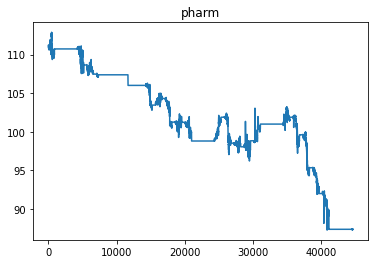

In [298]:
plt.plot(p) 
plt.title('pharm') 
plt.draw() 
plt.show()

In [299]:
pharm_15=pd.DataFrame(list(zip(dateList, p)), columns =['date', 'price'])



In [31]:
pharm_15.to_csv(r'/Users/zlatatabachova/Documents/python/sp500_all.txt', sep=';', index=None)


In [300]:
len(pharm_15)

44639

In [301]:
opening = '15:31'
open_dt = datetime.datetime.strptime(opening, '%H:%M')
open_date = open_dt.time()
closing = '22:01'
closing_dt = datetime.datetime.strptime(closing, '%H:%M')
close_date = closing_dt.time()

In [302]:
ll=0
li=[]
for k in range(0,len(pharm_15)):
    if pharm_15['date'][k].weekday()>4:
        #ph_15=pharm_15.drop(k)
        li.append(k)
        ll=ll+1

ph_15=pharm_15.drop(li) 

In [303]:
ph_15=ph_15.reset_index()

In [304]:
lll=0
lii=[]
for k in range(0,len(ph_15)):
    if open_date>ph_15['date'][k].time() or ph_15['date'][k].time()>close_date:
        #ph_15=ph_15.drop(k)
        lii.append(k)
        lll=lll+1
ph_15=ph_15.drop(lii) 
ph_15=ph_15.reset_index()

In [305]:
ph_15=ph_15.sort_values(['date'], ascending=[1])
ph_15=ph_15.drop("index", axis=1)
ph_15=ph_15.drop('level_0',axis=1)

In [306]:
ph_15=ph_15.reset_index()
ph_15=ph_15.drop("index", axis=1)

In [307]:
ph_15

,date,price
0,2022-10-03 15:31:00,87.31
1,2022-10-03 15:32:00,90.17
2,2022-10-03 15:33:00,90.55
3,2022-10-03 15:34:00,90.79
4,2022-10-03 15:35:00,90.89
...,...,...
8206,2022-10-31 21:57:00,110.84
8207,2022-10-31 21:58:00,110.80
8208,2022-10-31 21:59:00,110.81
8209,2022-10-31 22:00:00,110.81


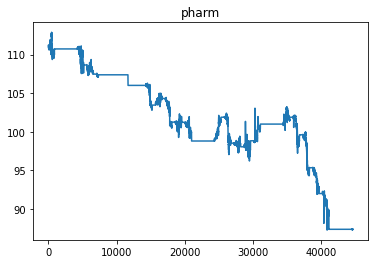

In [308]:
plt.plot(pharm_15['price']) 
plt.title('pharm') 
plt.draw() 
plt.show()

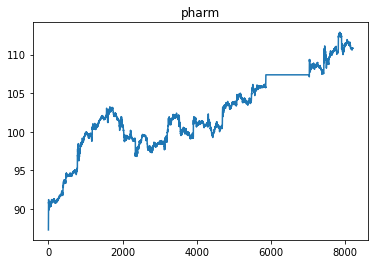

In [309]:
plt.plot(ph_15['price']) 
plt.title('pharm') 
plt.draw() 
plt.show()

In [310]:
next = ph_15['price'][0]
log_returns =[]
for k in range(1,len(ph_15)):
    log_returns.append(np.log(ph_15['price'][k]/next))
    next = ph_15['price'][k]

log_returns.append(0)

In [311]:
ph_15['returns']=log_returns

In [312]:
ph_15

,date,price,returns
0,2022-10-03 15:31:00,87.31,0.032232
1,2022-10-03 15:32:00,90.17,0.004205
2,2022-10-03 15:33:00,90.55,0.002647
3,2022-10-03 15:34:00,90.79,0.001101
4,2022-10-03 15:35:00,90.89,-0.001542
...,...,...,...
8206,2022-10-31 21:57:00,110.84,-0.000361
8207,2022-10-31 21:58:00,110.80,0.000090
8208,2022-10-31 21:59:00,110.81,0.000000
8209,2022-10-31 22:00:00,110.81,0.000000


In [313]:
ph_15.to_csv(r'/Users/zlatatabachova/Documents/entropy/data/october/exxon.txt', sep=';', index=None)


In [132]:
data_done = pd.read_csv('/Users/zlatatabachova/Documents/python/unitedhealthgroup.txt', delimiter=';') 

In [136]:
data_done['returns'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [138]:
merge_data=[data_done['returns'].values,data_done['date'].values]

In [140]:
pd.DataFrame(merge_data)

,0,1,2,3,4,5,6,7,8,9,...,7810,7811,7812,7813,7814,7815,7816,7817,7818,7819
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000118,-0.000336,0.000276,-0.001145,0.000474,-0.000079,-0.002413,0.0,0.0,0.0
1,2022-09-05 15:31:00,2022-09-05 15:32:00,2022-09-05 15:33:00,2022-09-05 15:34:00,2022-09-05 15:35:00,2022-09-05 15:36:00,2022-09-05 15:37:00,2022-09-05 15:38:00,2022-09-05 15:39:00,2022-09-05 15:40:00,...,2022-09-30 21:52:00,2022-09-30 21:53:00,2022-09-30 21:54:00,2022-09-30 21:55:00,2022-09-30 21:56:00,2022-09-30 21:57:00,2022-09-30 21:58:00,2022-09-30 21:59:00,2022-09-30 22:00:00,2022-09-30 22:01:00


In [34]:
##log return before data processing
d_15=data_15.sort_values(['created_at'], ascending=[1])
d_15=d_15.reset_index()
next_d = d_15['price'][0]
log_returns_d =[]
for k in range(1,len(d_15)):
    log_returns_d.append(np.log(d_15['price'][k]/next_d))
    next_d = d_15['price'][k]

In [36]:
##drop returns between close and open
trading_day=(22-15.5)*60
log_ret=pd.DataFrame(log_returns)
jj=1
liii=[]
for j in range(0,len(log_ret)):
    if j == trading_day*jj:
        #log_ret=log_ret.drop(j)
        liii.append(j)
        jj=jj+1
log_ret=log_ret.drop(liii)

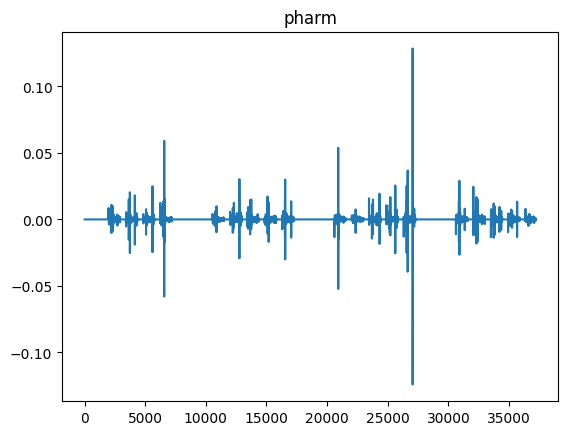

In [37]:
plt.plot(log_returns_d) 
plt.title('pharm') 
plt.draw() 
plt.show()

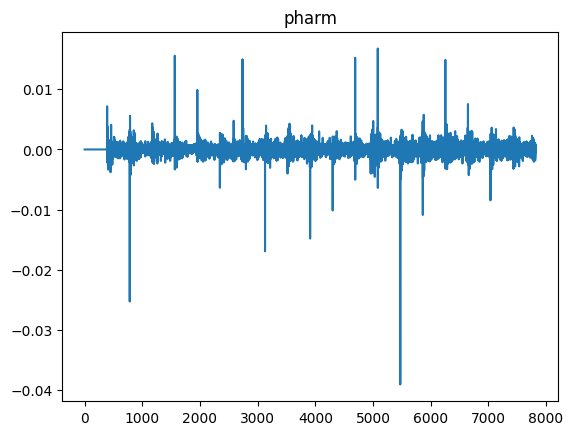

In [54]:
plt.plot(log_returns) 
plt.title('pharm') 
plt.draw() 
plt.show()

In [99]:
X = log_returns
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = mean(X1), mean(X2)
var1, var2 = np.var(X1), np.var(X2)
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=-0.000007, mean2=-0.000016
variance1=0.000001, variance2=0.000002


In [ ]:
from statsmodels.tsa.stattools import adfuller
   print(adfuller(ts))